<a href="https://colab.research.google.com/github/HenriquedoVal/BTC-vs-Meme/blob/main/BTC_vs_Meme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sobre:
Breve análise de algumas diferenças entre criptomoedas fundamentadas e memecoins (cujo fundamento é a _hype_). Aqui foram usados os dados do Bitcoin e da Dogecoin.
Datasets retirados do Kaggle. Em desenvolvimento.

# Setup

In [2]:
!pip install pandera #Sintaxe para acessar o terminal no Colab

     |████████████████████████████████| 166 kB 5.5 MB/s 


In [3]:
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt

In [4]:
pd.options.display.float_format = '{:,.2f}'.format #Para formatar a notação científica

# Bitcoin

## Extração e validação

In [5]:
dfbtc = pd.read_csv('/content/drive/MyDrive/Datasets/BTC & Meme/Bitcoin.csv', parse_dates=['Date'])
dfbtc.sample(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1005,2018-09-26,"6,452.79","6,585.91","6,397.89","6,495.00","4,437,300,000.00","112,300,336,125.00"
2973,2013-07-05,112.25,113.44,97.70,111.50,0.00,"1,240,593,600.00"
127,2021-02-20,"55,887.34","57,505.23","54,626.56","56,099.52","68,145,460,025.92","1,045,371,087,640.23"
263,2020-07-10,"10,603.36","10,680.51","10,562.51","10,668.97","37,799,458,435.80","197,485,816,054.93"
1893,2016-04-21,441.42,450.55,440.95,449.42,"68,204,704.00","6,947,795,902.50"


In [6]:
dfbtc.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [7]:
dfbtc.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [8]:
dfbtc['Drawdown'] = dfbtc['High'] - dfbtc['Low']
dfbtc.sample(5)

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
989,2018-12-10,"6,239.25","6,328.50","6,236.47","6,274.58","3,783,500,000.00","108,669,526,315.00",92.03
494,2020-02-19,"10,143.80","10,191.68","9,611.22","9,633.39","46,992,019,709.92","175,585,931,679.44",580.45
1937,2016-08-03,414.46,416.24,411.09,413.97,"70,311,696.00","6,331,422,308.90",5.15
2633,2014-12-04,420.89,439.61,415.79,421.12,"19,226,500.00","5,321,874,505.80",23.82
2590,2014-05-25,525.23,576.48,525.23,571.59,"47,010,300.00","7,325,371,780.10",51.25


In [9]:
#Validação dos dados - Perfumaria, uma vez que a fonte de dados é bem consistente
schema = pa.DataFrameSchema(
    columns = {
        'Date': pa.Column(pa.DateTime),
        'Open': pa.Column(pa.Float),
        'High': pa.Column(pa.Float),
        'Low': pa.Column(pa.Float),
        'Close': pa.Column(pa.Float),
        'Volume': pa.Column(pa.Float),
        'Market Cap': pa.Column(pa.Float),
        'Drawdown': pa.Column(pa.Float)
})

In [10]:
schema.validate(dfbtc)

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
0,2021-06-27,"32,287.52","34,656.13","32,071.76","34,649.64","35,511,640,893.97","649,461,677,014.12","2,584.37"
1,2021-06-26,"31,594.66","32,637.59","30,184.50","32,186.28","38,585,385,521.38","603,276,028,308.72","2,453.09"
2,2021-06-25,"34,659.10","35,487.25","31,350.88","31,637.78","40,230,904,226.00","592,978,211,189.03","4,136.36"
3,2021-06-24,"33,682.80","35,228.85","32,385.21","34,662.44","33,123,368,116.18","649,643,997,441.37","2,843.64"
4,2021-06-23,"32,515.71","34,753.41","31,772.63","33,723.03","46,317,108,924.69","632,011,278,436.38","2,980.78"
...,...,...,...,...,...,...,...,...
2978,2013-02-05,116.38,125.60,92.28,105.21,0.00,"1,168,517,495.25",33.32
2979,2013-01-05,139.00,139.89,107.72,116.99,0.00,"1,298,954,593.75",32.17
2980,2013-04-30,144.00,146.93,134.05,139.00,0.00,"1,542,813,125.00",12.88
2981,2013-04-29,134.44,147.49,134.00,144.54,0.00,"1,603,768,864.50",13.49


# Dogecoin

## Extração e validação

In [11]:
dfdoge = pd.read_csv('/content/drive/MyDrive/Datasets/BTC & Meme/Dogecoin.csv', parse_dates=['Date'])
dfdoge

,Date,Open,High,Low,Close,Volume,Market Cap
0,2021-06-27,0.25,0.27,0.24,0.26,"2,167,521,670.48","34,431,598,885.98"
1,2021-06-26,0.24,0.26,0.23,0.24,"2,649,457,301.97","31,867,533,718.63"
2,2021-06-25,0.26,0.29,0.23,0.24,"5,542,163,262.31","31,131,171,916.24"
3,2021-06-24,0.23,0.27,0.22,0.26,"3,844,648,059.04","34,205,589,762.94"
4,2021-06-23,0.19,0.25,0.18,0.23,"5,098,674,891.27","30,217,348,680.34"
...,...,...,...,...,...,...,...
2747,2013-12-19,0.00,0.00,0.00,0.00,0.00,"11,150,339.22"
2748,2013-12-18,0.00,0.00,0.00,0.00,0.00,"3,188,943.21"
2749,2013-12-17,0.00,0.00,0.00,0.00,0.00,"2,169,687.98"
2750,2013-12-16,0.00,0.00,0.00,0.00,0.00,"1,509,085.16"


In [12]:
dfdoge.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [13]:
dfdoge.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [14]:
dfdoge['Drawdown'] = dfdoge['High'] - dfdoge['Low'] #Drawdown é uma forma de medir a volatilidade, neste caso, diária
dfdoge.sample(5)

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
2622,2014-04-23,0.00,0.00,0.00,0.00,"1,276,710.00","41,808,109.74",0.00
1449,2017-09-07,0.00,0.00,0.00,0.00,"4,122,620.00","256,657,309.21",0.00
1923,2016-03-22,0.00,0.00,0.00,0.00,"173,999.00","22,463,611.28",0.00
1236,2018-07-02,0.00,0.00,0.00,0.00,"12,990,100.00","486,004,813.25",0.00
427,2020-04-26,0.00,0.00,0.00,0.00,"287,859,775.04","299,489,107.99",0.00


In [15]:
schema.validate(dfdoge) #Schema já está definido

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
0,2021-06-27,0.25,0.27,0.24,0.26,"2,167,521,670.48","34,431,598,885.98",0.03
1,2021-06-26,0.24,0.26,0.23,0.24,"2,649,457,301.97","31,867,533,718.63",0.02
2,2021-06-25,0.26,0.29,0.23,0.24,"5,542,163,262.31","31,131,171,916.24",0.06
3,2021-06-24,0.23,0.27,0.22,0.26,"3,844,648,059.04","34,205,589,762.94",0.05
4,2021-06-23,0.19,0.25,0.18,0.23,"5,098,674,891.27","30,217,348,680.34",0.07
...,...,...,...,...,...,...,...,...
2747,2013-12-19,0.00,0.00,0.00,0.00,0.00,"11,150,339.22",0.00
2748,2013-12-18,0.00,0.00,0.00,0.00,0.00,"3,188,943.21",0.00
2749,2013-12-17,0.00,0.00,0.00,0.00,0.00,"2,169,687.98",0.00
2750,2013-12-16,0.00,0.00,0.00,0.00,0.00,"1,509,085.16",0.00


# Análise exploratória

In [16]:
dfbtc.loc[dfbtc['Market Cap'] == dfbtc['Market Cap'].max()]

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
75,2021-04-13,"59,890.02","63,742.28","59,869.96","63,503.46","69,983,454,361.84","1,186,364,044,140.27","3,872.33"


In [17]:
dfdoge.loc[dfdoge['Market Cap'] == dfdoge['Market Cap'].max()]

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
51,2021-07-05,0.58,0.73,0.52,0.68,"28,615,083,656.92","88,680,824,303.07",0.21


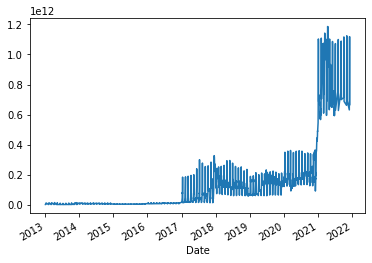

In [18]:
dfbtc.groupby('Date')['Market Cap'].sum().plot();

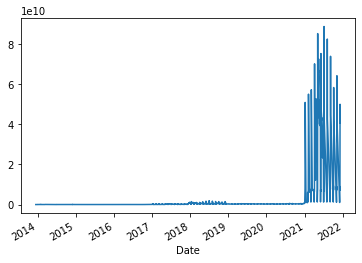

In [19]:
dfdoge.groupby('Date')['Market Cap'].sum().plot();

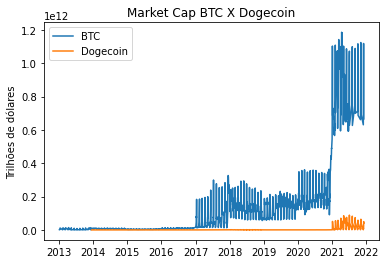

In [20]:
btc = dfbtc.groupby('Date')['Market Cap'].sum()
doge = dfdoge.groupby('Date')['Market Cap'].sum()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(btc, color='tab:blue', label='BTC')
ax.plot(doge, color='tab:orange', label='Dogecoin')

plt.title('Market Cap BTC X Dogecoin')
plt.ylabel('Trilhões de dólares')
plt.legend();